In [1]:
import qiskit

In [4]:
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import breast_cancer
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

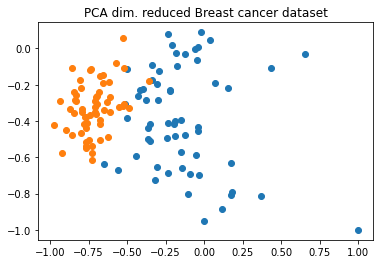

{'A': 0, 'B': 1}


In [13]:
feature_dim = 2
train_size = 60
test_size = 20
seed = 1024
shots = 10000

sample_Total, training_input, test_input, class_labels = breast_cancer(training_size=train_size, 
                                                                        test_size=test_size,
                                                                        # gap = 0.3, # gap is the gap in the higher dim space that will sep the data
                                                                        n=feature_dim,
                                                                        plot_data = True)

datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

In [14]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = seed
quantum_instance = QuantumInstance(backend, shots, seed_simulator=seed, seed_transpiler=seed)
result = svm.run(quantum_instance)

Kernel matrix during training:


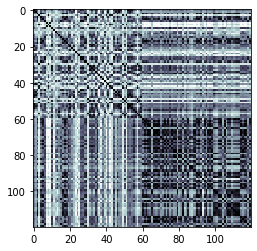

In [15]:
print("Kernel matrix during training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix),
                    interpolation='nearest',
                    origin='upper',
                    cmap='bone_r')

In [16]:
pred_labels = svm.predict(datapoints[0])
pred_classes = map_label_to_class_name(pred_labels, svm.label_to_class)
print(f"Ground truth:   {datapoints[1]}")
print(f"Prediction:     {pred_labels}")
print(f"Testing accuracy: {result['testing_accuracy']}")

Ground truth:   [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Prediction:     [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]
Testing accuracy: 0.925
